# Solving the Infinite Square Well With Python
## Basic Set Up
Suppose an electron (mass $m$) is trapped in an infinite square well; $0 \leq x \leq a$ such that: 

$$\begin{cases} V(x) = 0 & \text{for } 0 \leq x \leq a \\ \infty & \text{otherwise.} \end{cases} $$

The Time-Independent Schrodiner Equation for this system is: 

$$\hat H \psi = E \psi \Leftrightarrow -\frac{\hbar^2}{2m} \frac{d^2 \psi }{dx^2} = E \psi $$

With boundary conditions: $\psi(0) = \psi(a) =0$ to ensure that the wavefunction is continuous. 
There is also a normalising constraint: 

$$\int_{-\infty}^{\infty} |\psi_n(x)|^2 dx =1.$$

This is because $|\psi|^2$  the probability of finding the particle between $x$ and $x+dx$ so it must integrate to $1$ over all space. 

We know that the solutions are just: 

$$\psi_n(x) = \sqrt{\frac 2a} \sin \left( \frac{n \pi x}a \right). $$

And the energy levels are:

$$E_n = \frac{\hbar^2 \pi^2 n^2}{2ma^2}.$$

## Numerical Method

To solve the TISE using Python, we need to turn the Schrödinger differential equation into a ***difference equation***. 

We discretise space into an $N$ point grid with $x_0=0$ and $x_N=a$ and a grid point spacing of $\Delta x$.

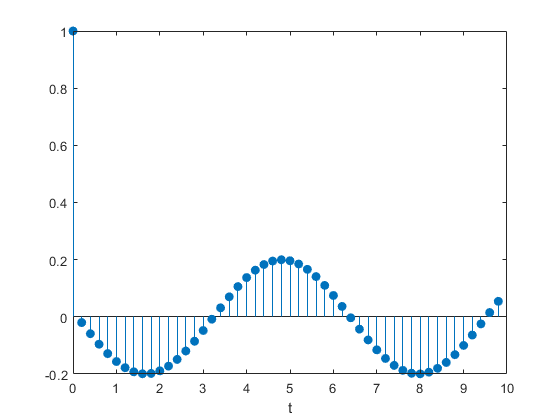

Credit: ```mathworks```, https://www.mathworks.com/help/matlab/ref/ss2tf.html .

The Hamiltonian for the infinite square well is just the kinetic energy: $-\frac{\hbar^2}{2m} \frac{d^2}{dx^2}$. 

So we need to express the differential operator $\frac{d^2}{dx^2}$ on our grid! 

First, we can approximate the derivative of $f$ at $x_i$ by a *finite difference*: 

$$f'(x_i) \approx \frac{f(x_i + \Delta x) - f(x_i)}{\Delta x} = \frac{f(x_{i+1}) - f(x_i)}{\Delta x}.$$



It is important to note that this quantity is not defined at the end of the grid since $x_{N+1}$ does not exist. The above expression is called a *forward difference*. We can also have backwards and central differences.



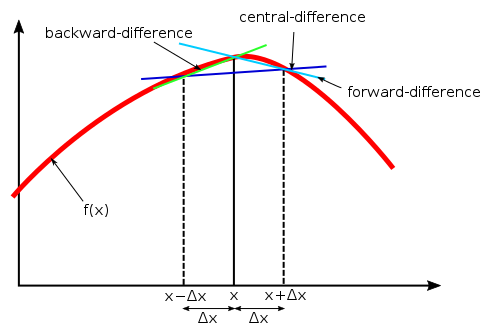

Credit: ```wikimedia commons```: https://commons.wikimedia.org/wiki/File:Finite_difference_method.svg

Using all of this, we can approximate $f''(x_i)$. First, we express $f''(x_i)$ as a forward difference of first derivatives: 

$$f''(x_i) \approx \frac{f'(x_{i+1})-f'(x_i)}{\Delta x}$$

Then, each derivative in the expression above can be written as a backward difference, so that:

$$f''(x_i) \approx \frac{ \frac{f(x_{i+1})-f(x_i)}{\Delta x} - \frac{ f(x_i) - f(x_{i-1})}{\Delta x}}{\Delta x} = \frac{f(x_{i+1})-2f(x_i) +f(x_{i-1})}{\Delta x^2}$$

So the differential operator $\frac{d^2}{dx^2}$ is a linear operator (matrix) on our discrete space (check the matrix vector product!). Now we can write the TISE in discrete form: 

$$ \hat H = -\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} \approx -\frac{\hbar^2}{2m} \frac 1{(\Delta x)^2} \begin{pmatrix} 
    -2 & 1 & 0 & 0& \dots \\
    1 & -2 & 1 & 0&\dots \\
    0 & 1 & -2 & 1 & \dots \\ 
    \vdots & \ddots & \ddots& \ddots &\dots \\
    0 & \dots & \dots  & 0 & 1 &-2 \\
    \end{pmatrix} \begin{pmatrix} \psi(x_1) \\ \psi(x_2) \\ \dots \\ \dots \\ \psi(x_{N-1}) \end{pmatrix}.$$
    
   
Note we only include steps from $\psi(x_1)$ to $\psi(x_{N-1})$ because of the boundary conditions $\psi(0) = \psi(a) = 0$. 
    
    
 
## Integral 
In a similar way, we can define an integral operator that integrates a function on our discrete space. This can just be expressed by a *Riemann Sum* : 

$$\int_{x_1}^{x_N} f(x) dx \approx \sum_{i=1}^N f(x_i) \Delta x $$
    
    
    
Now we have all we need to solve the infinite square well problem using Python!




In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#creating the grid
a=2
N=600
x = np.linspace(0,a,N+1)
Delta_x = x[1]-x[0]

#constants AMU
hbar =1
m =1

In [4]:
#creating the differential operator
M = np.diag(-2*np.ones(N-1)) + np.diag(np.ones(N-2),1)+ np.diag(np.ones(N-2),-1)
print(M)
print(M.shape)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
(599, 599)


In [5]:
#hamiltonian
H = -hbar**2/(2*m)* 1/(Delta_x)**2 * M

#solve the equation
E, psi = np.linalg.eigh(H)

In [6]:
#to access by psi[n]
psi = psi.T

In [7]:
#normalise

def integral(f, axis=0):
    return np.sum(f*Delta_x, axis=axis)

norms = integral(psi**2)
psi = psi/np.sqrt(norms)

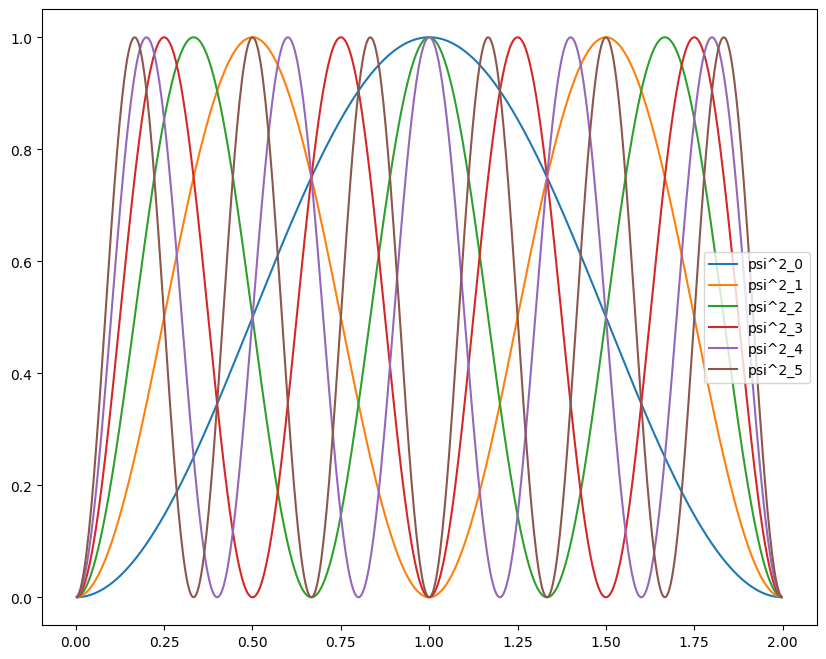

In [8]:
plt.figure(figsize=(10,8))

for n in range(0,6):
    
    plt.plot(x[1:-1], psi[n]**2, label = 'psi^2_{}'.format(n))
    plt.legend()

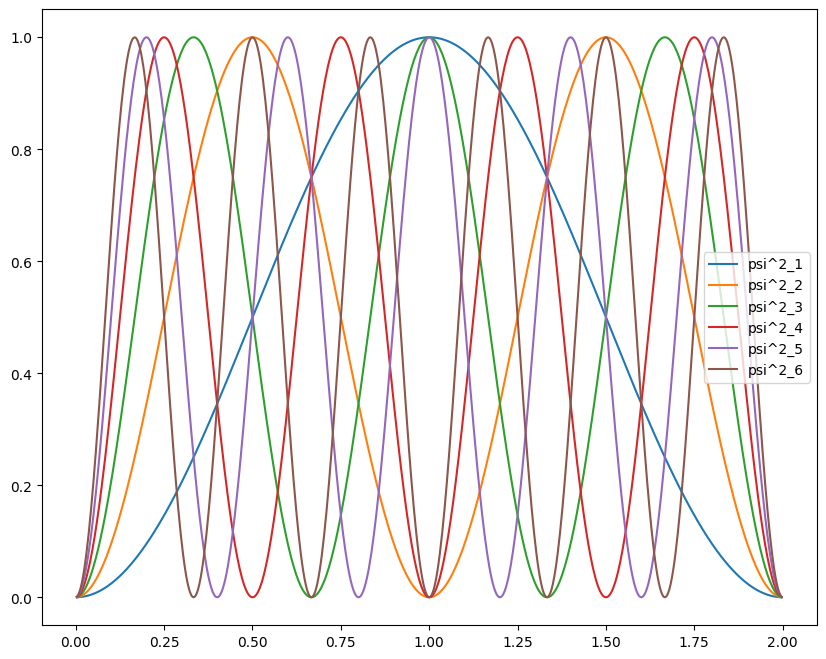

In [9]:
def true_psi(n,x):
    
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)


plt.figure(figsize=(10,8))

for n in range(1,7):
    
    plt.plot(x[1:-1], true_psi(n, x[1:-1])**2, label = 'psi^2_{}'.format(n))
    plt.legend()

In [10]:
#compare the obtained and true energies.

def energy(n):
    
    return hbar**2 * np.pi**2 * n**2/(2*m*a**2)

def relative_error(theo, obs):
    
    return abs( (theo-obs)/theo)*100


for n in range(0,6):
    
    print('Obtained energy: {:.3f}'.format(E[n]))
    
    print('True energy: {:.3f}'.format(energy(n+1)))
    
    print('Relative error: {:.3f}'.format(relative_error(energy(n+1), E[n])))
    

Obtained energy: 1.234
True energy: 1.234
Relative error: 0.000
Obtained energy: 4.935
True energy: 4.935
Relative error: 0.001
Obtained energy: 11.103
True energy: 11.103
Relative error: 0.002
Obtained energy: 19.738
True energy: 19.739
Relative error: 0.004
Obtained energy: 30.841
True energy: 30.843
Relative error: 0.006
Obtained energy: 44.410
True energy: 44.413
Relative error: 0.008


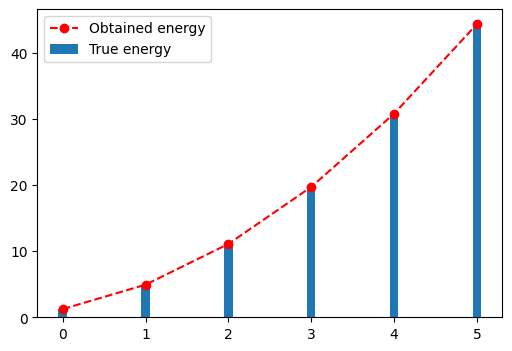

In [20]:
plt.figure(figsize=(6,4))
E_vals = []
n_vals = []
T_vals = []
R_vals = []
for n in range(0,6):
    n_vals.append(n)
    E_vals.append(E[n])
    T_vals.append(energy(n+1))
    R_vals.append(relative_error(energy(n+1), E[n]))
    
# print('Obtained energy: {:.3f}'.format(E[n]))
plt.plot(n_vals, E_vals,'ro--', label = 'Obtained energy')

# print('True energy: {:.3f}'.format(energy(n+1)))
plt.bar(n_vals, T_vals, width=0.1,  label = 'True energy')

# print('Relative error: {:.3f}'.format(relative_error(energy(n+1), E[n])))
# plt.plot(n_vals, R_vals, label = 'Relative error')

plt.legend()

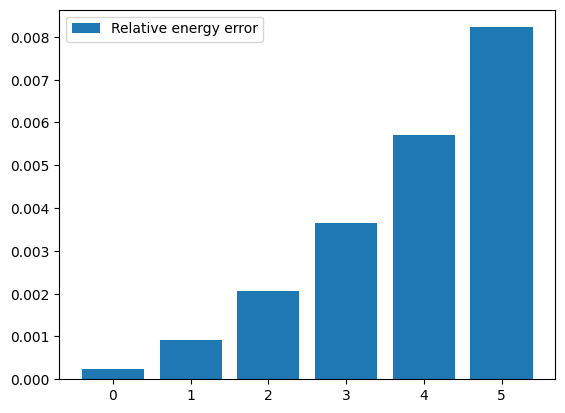

In [17]:
plt.bar(n_vals, R_vals, label = 'Relative energy error')

plt.legend()